In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/content/cardio_base.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [20]:
df.duplicated().sum()

0

In [21]:
df.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
smoke,0


In [22]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [24]:
df['age_real'] = (df['age']/365).round().astype(int)


In [25]:
df['age_real'].unique()

array([50, 55, 52, 48, 60, 61, 62, 54, 41, 40, 46, 58, 59, 63, 64, 57, 56,
       49, 51, 44, 65, 45, 53, 47, 42, 39, 43, 30])

In [26]:
df['cholesterol'].unique()

array([1, 3, 2])

In [27]:
df['young/old'] = df['age_real'].apply(lambda x: 'old' if x > 50 else 'young')

In [28]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_real,young/old
0,0,18393,2,168,62.0,110,80,1,0,50,young
1,1,20228,1,156,85.0,140,90,3,0,55,old
2,2,18857,1,165,64.0,130,70,3,0,52,old
3,3,17623,2,169,82.0,150,100,1,0,48,young
4,4,17474,1,156,56.0,100,60,1,0,48,young


In [29]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_real
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,65.000000


# do people over 50 have higher cholesterol levels than at rest?

Cholesterol level 1,2,3. maka kita mengasumsikan bahwa angka-angka ini merujuk pada rasio kolesterol LDL (Low-Density Lipoprotein) terhadap kolesterol HDL (High-Density Lipoprotein),
1. Kolesterol Level 1.0
Jika ini merujuk pada rasio kolesterol LDL terhadap HDL, maka:
LDL/HDL = 1.0: Rasio ini bisa dianggap sebagai rasio yang baik. Ini menunjukkan bahwa kolesterol LDL (kolesterol jahat) dan kolesterol HDL (kolesterol baik) berada dalam keseimbangan yang sehat. Namun, ini hanya satu komponen dari profil lipid yang lengkap.
2. Kolesterol Level 2.0
LDL/HDL = 2.0: Rasio ini mungkin menunjukkan bahwa kolesterol LDL (kolesterol jahat) dua kali lipat dari kolesterol HDL (kolesterol baik). Ini bisa menjadi indikasi bahwa ada ketidakseimbangan dalam rasio kolesterol, di mana kolesterol LDL lebih tinggi dibandingkan kolesterol HDL. Rasio ini, jika berkelanjutan, bisa meningkatkan risiko penyakit jantung.
3. Kolesterol Level 3.0
LDL/HDL = 3.0: Rasio ini lebih tinggi lagi, menunjukkan bahwa kolesterol LDL (kolesterol jahat) tiga kali lipat dari kolesterol HDL (kolesterol baik). Ini menunjukkan ketidakseimbangan yang lebih besar dalam profil lipid, yang dapat meningkatkan risiko penyakit jantung dan masalah kesehatan lainnya.
4. Kolesterol Level 0
LDL/HDL = 0: Jika ini merujuk pada rasio LDL terhadap HDL yang sama dengan nol, ini tidak mungkin secara biologis. Setiap orang memiliki baik kolesterol LDL maupun HDL dalam darah mereka, dan keduanya memiliki peran penting dalam metabolisme lemak tubuh.

In [20]:
mean_cholesterol = df.groupby('young/old')['cholesterol'].mean()


In [ ]:
mean_cholesterol_old = mean_cholesterol['old']
mean_cholesterol_young = mean_cholesterol['young']

total_mean_cholesterol = mean_cholesterol_old + mean_cholesterol_young
percentage_old = (mean_cholesterol_old / total_mean_cholesterol) * 100
percentage_young = (mean_cholesterol_young / total_mean_cholesterol) * 100
print(percentage_old)
print(percentage_young)

53.41367428026545
46.58632571973455


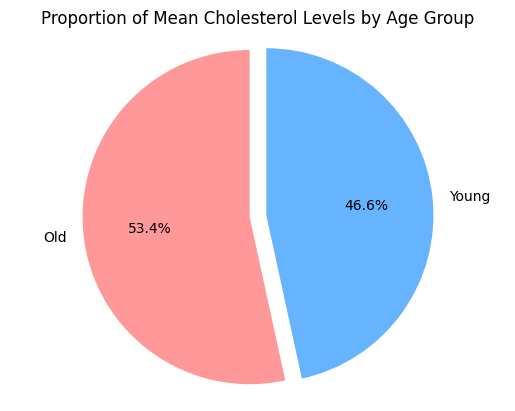

In [ ]:
import matplotlib.pyplot as plt

# Create a pie chart
labels = ['Old', 'Young']
sizes = [percentage_old, percentage_young]
colors = ['#ff9999', '#66b3ff']
explode = [0.1, 0]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Mean Cholesterol Levels by Age Group')
plt.show()

# are men more likely to be a smoker than women?

In [30]:
df['smoke'].unique()

array([0, 1])

Assume Smoker = 1, Non Smoker = 0 ; Assume Woman = 1, Man = 2


In [31]:
# Define Mapping for Gender
gender_mapping = {
    1: 'Woman',
    2: 'Man'
}

# Menggunakan mapping untuk mendapatkan keterangan gender pada indeks 1 dan 2
gender_at_index_1 = gender_mapping[df['gender'].iloc[0]]
gender_at_index_2 = gender_mapping[df['gender'].iloc[1]]
print(gender_at_index_1)
print(gender_at_index_2)

Man
Woman


In [32]:
df['gender_mapping'] = df['gender'].map(gender_mapping)

In [33]:
smoking_by_gender = df.groupby('gender_mapping')['smoke'].sum()
smoking_by_gender

,smoke
gender_mapping,
Man,5356
Woman,813


In [34]:
if smoking_by_gender['Man'] > smoking_by_gender['Woman']:
    print("Men are more likely to be smokers than women.")
elif smoking_by_gender['Man'] < smoking_by_gender['Woman']:
    print("Women are more likely to be smokers than men.")
else:
    print("Smoking prevalence is equal between men and women.")

Men are more likely to be smokers than women.


In [35]:
smoke_counts = df['smoke'].value_counts()
smoke_counts

,count
smoke,
0,63831
1,6169


In [36]:
gender_counts = df['gender_mapping'].value_counts()
gender_counts

,count
gender_mapping,
Woman,45530
Man,24470


In [37]:
men_who_smoke = df[(df['gender_mapping'] == 'Man') & (df['smoke'] == 1)]
women_who_smoke = df[(df['gender_mapping'] == 'Woman') & (df['smoke'] == 1)]

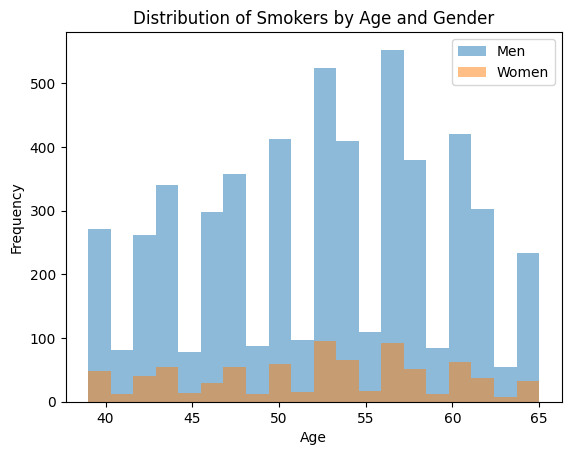

In [38]:
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()

# histogram of smokers among men
ax.hist(men_who_smoke['age_real'], bins=20, alpha=0.5, label='Men')

# histogram of smokers among women
ax.hist(women_who_smoke['age_real'], bins=20, alpha=0.5, label='Women')

# set title and labels
ax.set_title('Distribution of Smokers by Age and Gender')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

# legend
ax.legend()

# show the plot
plt.show()

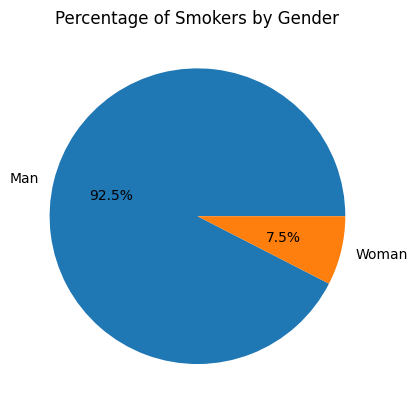

In [39]:
import matplotlib.pyplot as plt

# calculate the percentage of men and women who smoke
percent_men = (len(men_who_smoke) / len(df[df['gender_mapping'] == 'Man'])) * 100
percent_women = (len(women_who_smoke) / len(df[df['gender_mapping'] == 'Woman'])) * 100

# create a pie chart
plt.pie([percent_men, percent_women], labels=['Man', 'Woman'], autopct='%1.1f%%')

# set title
plt.title('Percentage of Smokers by Gender')

# show the plot
plt.show()

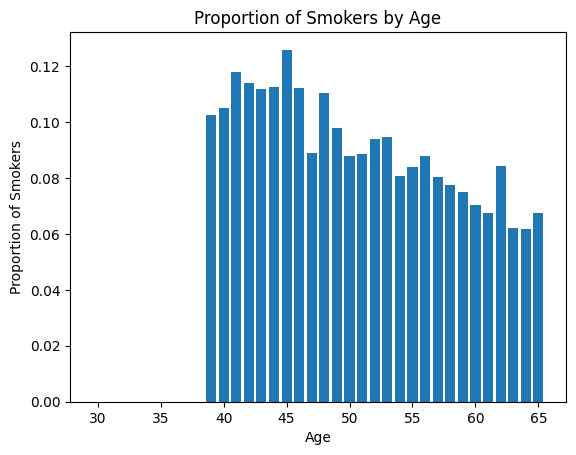

In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of smokers in each age group
smoker_proportion = merge_df.groupby('age_real')['smoke'].mean()

# Create a bar chart
plt.bar(smoker_proportion.index, smoker_proportion.values)
plt.xlabel('Age')
plt.ylabel('Proportion of Smokers')
plt.title('Proportion of Smokers by Age')
plt.show()

# By how many percent is the max_avg_weight of each age group heavier than the min_avg_weight?

In [40]:
# Group by age and calculate average weight for each age group
age_groups = df.groupby('age_real')['weight'].mean()

# Find the maximum and minimum average weight
max_avg_weight = age_groups.max()
min_avg_weight = age_groups.min()

# Calculate the percentage increase
percentage_increase = round(((max_avg_weight - min_avg_weight) / min_avg_weight) * 100)
print(f'{percentage_increase}% heavier')


12% heavier


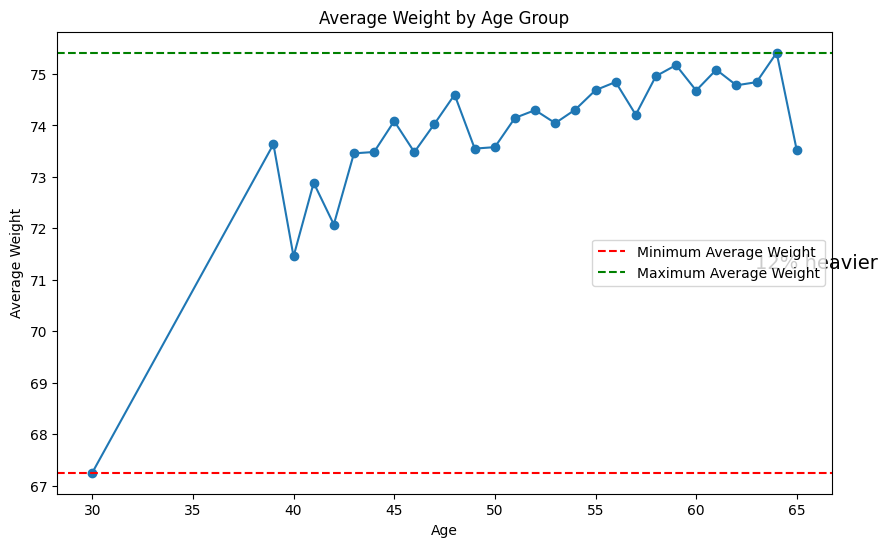

In [41]:
import matplotlib.pyplot as plt

# Plot the average weight for each age group
plt.figure(figsize=(10, 6))
plt.plot(age_groups.index, age_groups.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.title('Average Weight by Age Group')

# Add a horizontal line for the minimum average weight
plt.axhline(y=min_avg_weight, color='r', linestyle='--', label='Minimum Average Weight')

# Add a horizontal line for the maximum average weight
plt.axhline(y=max_avg_weight, color='g', linestyle='--', label='Maximum Average Weight')

# Add a text annotation for the percentage increase
plt.text(x=age_groups.index.max() + 1, y=(max_avg_weight + min_avg_weight) / 2,
         s=f'{percentage_increase}% heavier', ha='center', va='center', fontsize=14)

plt.legend()
plt.show()

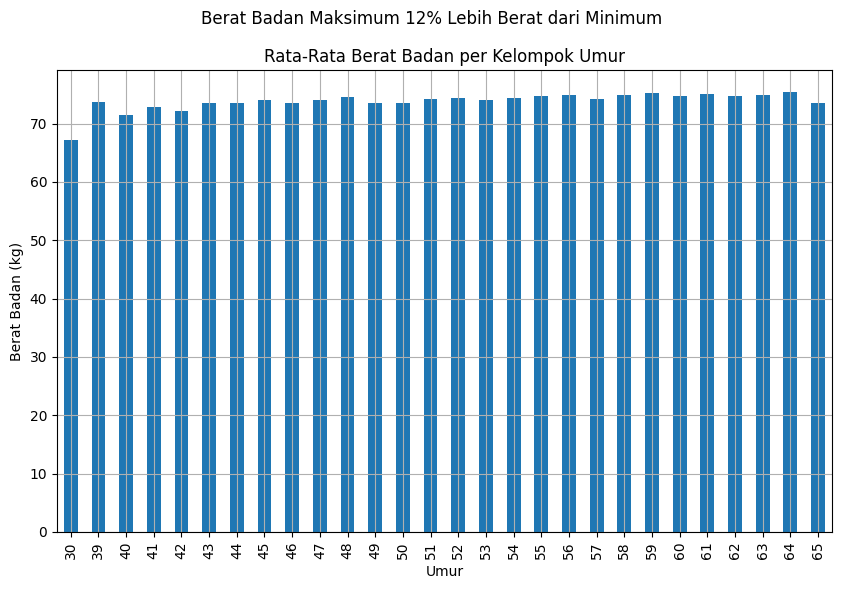

In [ ]:
# Buat plot
plt.figure(figsize=(10,6))
age_groups.plot(kind='bar')
plt.title('Rata-Rata Berat Badan per Kelompok Umur')
plt.xlabel('Umur')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)

# Tambahkan annotasi untuk nilai maksimum dan minimum
plt.annotate(f'Maksimum: {max_avg_weight:.2f} kg', xy=(age_groups.idxmax(), max_avg_weight), xytext=(0, 10), textcoords='offset points', ha='center')
plt.annotate(f'Minimum: {min_avg_weight:.2f} kg', xy=(age_groups.idxmin(), min_avg_weight), xytext=(0, -10), textcoords='offset points', ha='center')

# Tambahkan judul untuk persentase kenaikan
plt.suptitle(f'Berat Badan Maksimum {percentage_increase}% Lebih Berat dari Minimum')

# Tampilkan plot
plt.show()

# how tall are the tallest 1% of people

In [38]:
tallest_1_percent_height = df['height'].quantile(0.99)
tallest_1_percent_height

184.0

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

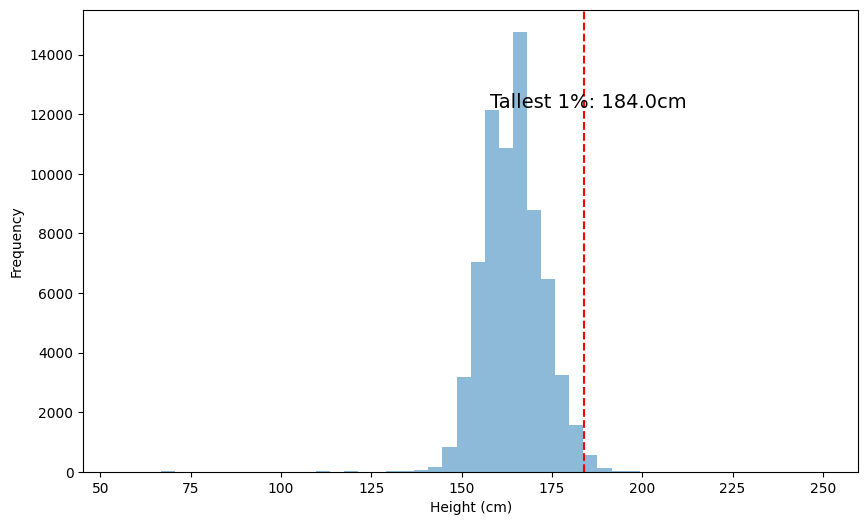

In [39]:
import matplotlib.pyplot as plt

# Plot the distribution of heights
plt.figure(figsize=(10, 6))
plt.hist(df['height'], bins=50, alpha=0.5, label='Height Distribution')

# Add a vertical line for the 99th percentile (tallest 1%)
plt.axvline(x=tallest_1_percent_height, color='r', linestyle='--', label='Tallest 1% (184cm)')

# Add a text annotation for the tallest 1% height
plt.text(x=tallest_1_percent_height + 1, y=plt.ylim()[1] * 0.8,
         s=f'Tallest 1%: {tallest_1_percent_height}cm', ha='center', va='center', fontsize=14)

plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title

# which two features have the highest spearman rank correlation?

In [63]:
spearman_corr = merge_df[['age_real', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'alco', 'smoke']].corr(method='spearman')
spearman_corr

,age_real,height,weight,ap_hi,ap_lo,cholesterol,alco,smoke
age_real,1.000000,-0.084015,0.062396,0.218476,0.157743,0.143304,-0.031642,-0.049284
height,-0.084015,1.000000,0.312239,0.015596,0.025335,-0.060766,0.096757,0.199860
weight,0.062396,0.312239,1.000000,0.275703,0.253068,0.137437,0.070025,0.072688
ap_hi,0.218476,0.015596,0.275703,1.000000,0.736204,0.209796,0.034335,0.027213
ap_lo,0.157743,0.025335,0.253068,0.736204,1.000000,0.168220,0.040559,0.024194
cholesterol,0.143304,-0.060766,0.137437,0.209796,0.168220,1.000000,0.040140,0.014973
alco,-0.031642,0.096757,0.070025,0.034335,0.040559,0.040140,1.000000,0.337381
smoke,-0.049284,0.199860,0.072688,0.027213,0.024194,0.014973,0.337381,1.000000


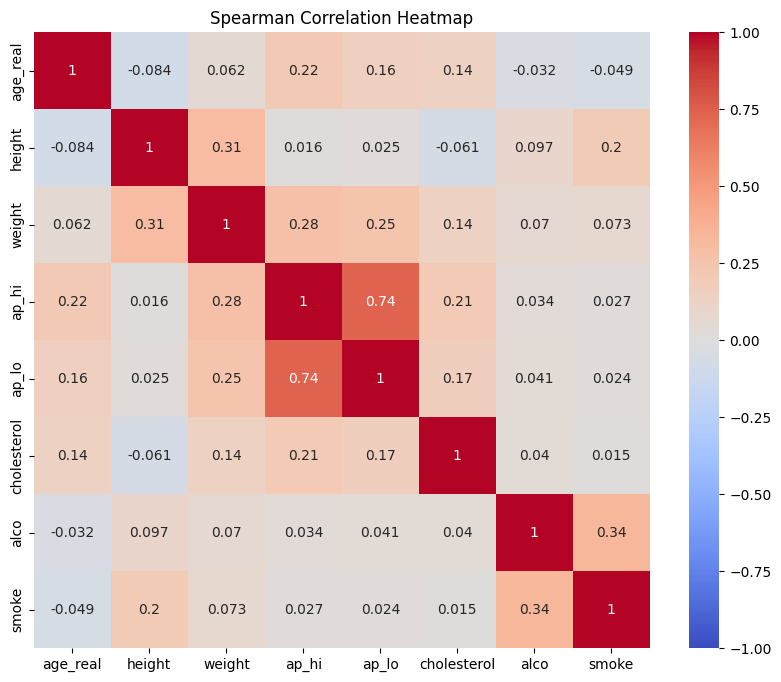

In [64]:
# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()

Tekanan darah sistolik (ap_hi) dan diastolik (ap_lo) adalah 0.735436, yang menunjukkan hubungan positif yang kuat antara kedua tekanan darah ini. Artinya, ketika tekanan darah sistolik cenderung tinggi, tekanan darah diastolik juga cenderung tinggi, dan sebaliknya. dan juga Height vs Weight: Korelasi Pearson (0.313569) menunjukkan hubungan positif yang sedang antara tinggi badan dan berat badan. Artinya, orang yang lebih tinggi cenderung memiliki berat badan yang lebih besar.

# what percentage of people are more than 2 standard deviations far from average height?

In [42]:
# calculate the mean and standard deviation of the 'height' column
mean_height = df['height'].mean()
print(mean_height)
std_height = df['height'].std()
print(std_height)

164.35922857142856
8.210126364538038


In [43]:
# calculate the upper and lower bounds for 2 standard deviations from the mean
upper_bound = mean_height + 2 * std_height
lower_bound = mean_height - 2 * std_height

# count the number of people whose height is above the upper bound or below the lower bound
count = len(df[(df['height'] > upper_bound) | (df['height'] < lower_bound)])

# calculate the percentage of people who are more than 2 standard deviations far from the average height
percent = (count / len(df)) * 100
print(f"{percent:.2f}% of people are more than 2 standard deviations far from the average height.")


3.34% of people are more than 2 standard deviations far from the average height.


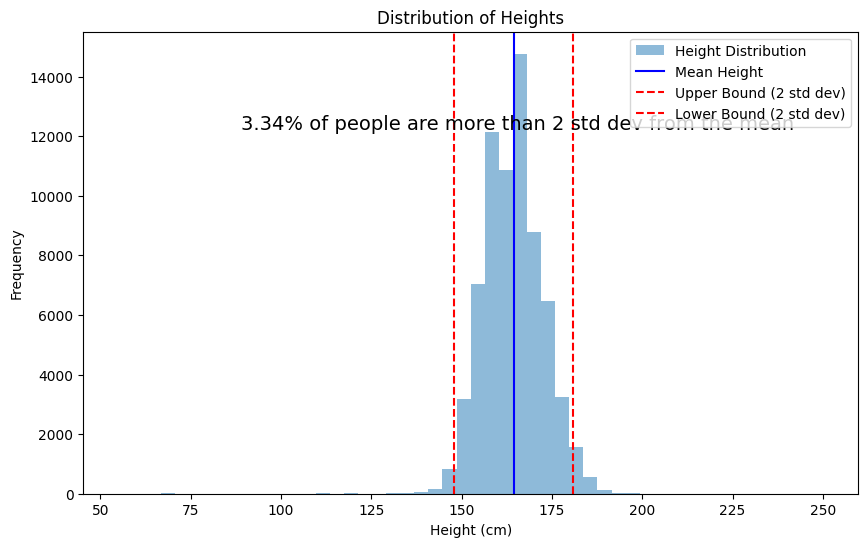

In [42]:
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of heights
mean_height = df['height'].mean()
std_height = df['height'].std()

# Calculate the upper and lower bounds for 2 standard deviations from the mean
upper_bound = mean_height + 2 * std_height
lower_bound = mean_height - 2 * std_height

# Plot the distribution of heights
plt.figure(figsize=(10, 6))
plt.hist(df['height'], bins=50, alpha=0.5, label='Height Distribution')

# Add vertical lines for the mean, upper bound, and lower bound
plt.axvline(x=mean_height, color='b', linestyle='-', label='Mean Height')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound (2 std dev)')
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound (2 std dev)')

# Add a text annotation for the percentage of people outside 2 std dev
plt.text(x=mean_height + 1, y=plt.ylim()[1] * 0.8,
         s=f"{percent:.2f}% of people are more than 2 std dev from the mean", ha='center', va='center', fontsize=14)

plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Heights')
plt.legend()
plt.show()

In [44]:
df_alco = pd.read_csv('/content/cardio_alco.csv')
df_alco.head()


,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [45]:
df_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


In [46]:
df_alco.duplicated().sum()

0

In [47]:
df_alco.isna().sum()

,0
id,0
alco,0


In [80]:
merge_df = pd.merge(df, df_alco, on='id')
merge_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_real,young/old,gender_mapping,alco
0,44,14605,1,159,60.0,110,70,1,0,40,young,Woman,0
1,45,20652,1,160,73.0,130,85,1,0,57,old,Woman,0
2,46,21940,2,173,82.0,140,90,3,0,60,old,Man,0
3,47,20404,1,163,55.0,120,80,1,0,56,old,Woman,0
4,49,18328,2,175,95.0,120,80,1,0,50,young,Man,0


# How many people above age 50 are alcoholics?

In [16]:
merge_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke', 'age_real', 'alco'],
      dtype='object')

In [49]:
alcoholics_above_50 = merge_df[(merge_df['age_real'] > 50) & (merge_df['alco'] == 1)]

# count the number of people who meet the condition
count = len(alcoholics_above_50)

print(f"There are {count} people above age 50 who are alcoholics.")

There are 1841 people above age 50 who are alcoholics.


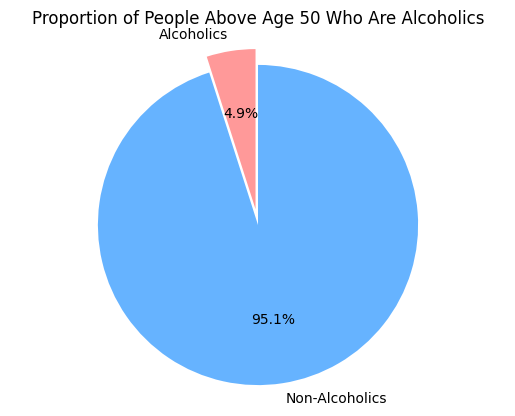

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of people above age 50
total_above_50 = len(merge_df[merge_df['age_real'] > 50])

# Calculate the proportion of people above age 50 who are alcoholics
proportion_alcoholics = len(alcoholics_above_50) / total_above_50

# Create a pie chart
labels = ['Alcoholics', 'Non-Alcoholics']
sizes = [proportion_alcoholics, 1 - proportion_alcoholics]
colors = ['#ff9999', '#66b3ff']
explode = [0.1, 0]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of People Above Age 50 Who Are Alcoholics')
plt.show()

In [88]:
# Calculate the count of alcoholics and smoker by gender
alcoholic_by_gender = merge_df.groupby('gender_mapping').alco.sum()
print(alcoholic_by_gender)
smoke_by_gender = merge_df.groupby('gender_mapping').smoke.sum()
print(smoke_by_gender)

gender_mapping
Man      2100
Woman     941
Name: alco, dtype: int64
gender_mapping
Man      4364
Woman     675
Name: smoke, dtype: int64


Text(0, 0.5, 'Count of Smokers')

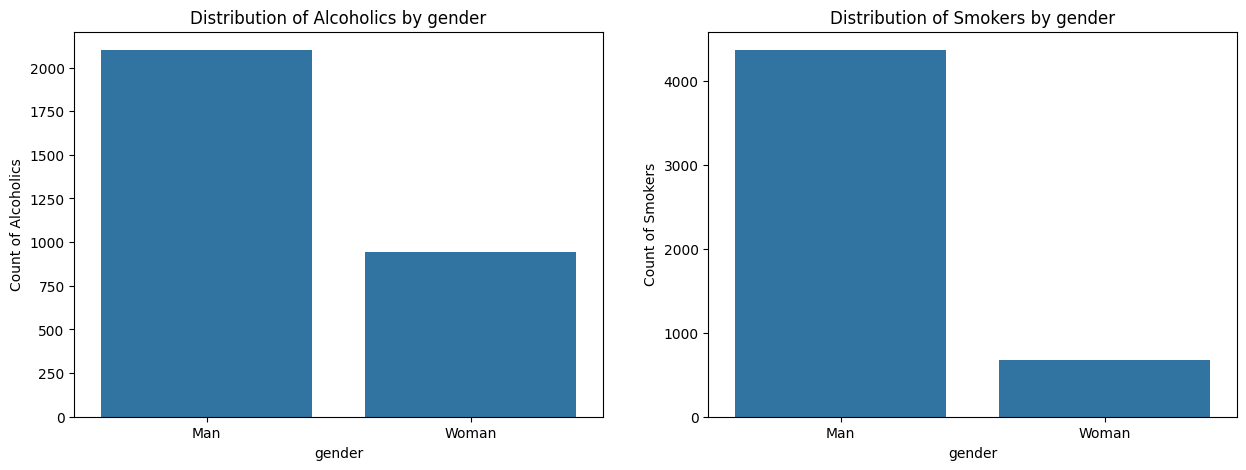

In [89]:
fg, axs =plt.subplots(1,2, figsize=(15,5))

sns.barplot(x=alcoholic_by_gender.index, y=alcoholic_by_gender.values, ax=axs[0])
axs[0].set_title('Distribution of Alcoholics by gender')
axs[0].set_xlabel('gender')
axs[0].set_ylabel('Count of Alcoholics')
sns.barplot(x=smoke_by_gender.index, y=smoke_by_gender.values, ax=axs[1])
axs[1].set_title('Distribution of Smokers by gender')
axs[1].set_xlabel('gender')
axs[1].set_ylabel('Count of Smokers')

In [81]:
alcoholic_by_age = merge_df.groupby('age_real').alco.sum()
smoke_by_age = merge_df.groupby('age_real').smoke.sum()

transformed_data = pd.pivot_table(merge_df, values=['alco', 'smoke'], index='age_real', aggfunc='sum').T
transformed_data

age_real,30,39,40,41,42,43,44,45,46,47,...,56,57,58,59,60,61,62,63,64,65
alco,0,30,134,39,147,33,142,39,159,33,...,244,59,251,55,191,41,146,24,137,13
smoke,0,34,228,74,242,64,260,76,270,54,...,427,94,361,83,309,66,271,51,199,19


Text(0, 0.5, 'Count of Smokers')

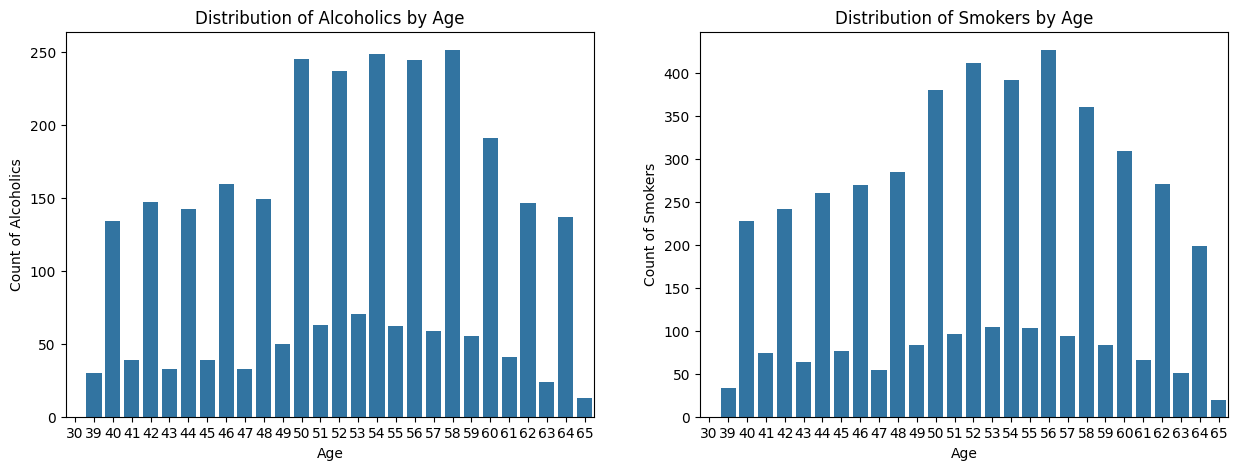

In [87]:
fg, axs =plt.subplots(1,2, figsize=(15,5))

sns.barplot(x=alcoholic_by_age.index, y=alcoholic_by_age.values, ax=axs[0])
axs[0].set_title('Distribution of Alcoholics by Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count of Alcoholics')
sns.barplot(x=smoke_by_age.index, y=smoke_by_age.values, ax=axs[1])
axs[1].set_title('Distribution of Smokers by Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count of Smokers')

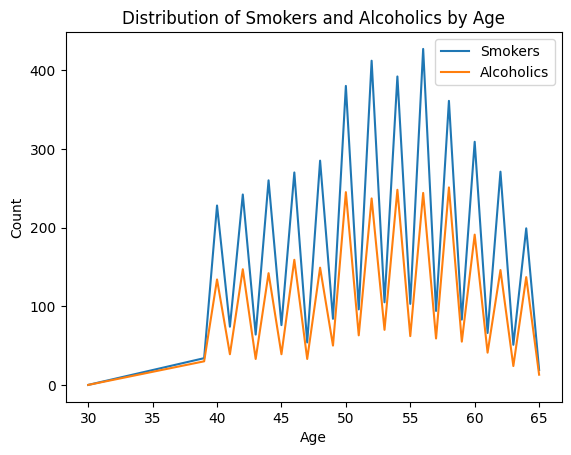

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of smokers and alcoholics in each age group
smoker_count = merge_df.groupby('age_real')['smoke'].sum()
alcoholic_count = merge_df.groupby('age_real')['alco'].sum()

# Create a line chart
plt.plot(smoker_count.index, smoker_count.values, label='Smokers')
plt.plot(alcoholic_count.index, alcoholic_count.values, label='Alcoholics')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Alcoholics by Age')
plt.legend()
plt.show()